In [1]:
import numpy as np
import matplotlib as mp
import seaborn as sns
import random as rand
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
combine = [train, test]


In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
train.info()
print('_ '*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Analysing by pivoting feature

the survive rate in order for pClass

In [11]:

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by = 'Survived', ascending=False)
# it's really a moron

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


# Analyzing by visualizing data

<AxesSubplot:xlabel='Age', ylabel='Count'>

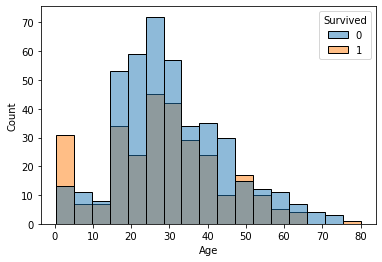

In [16]:
sns.histplot(x = 'Age', hue= 'Survived' , data = train, bins=17)

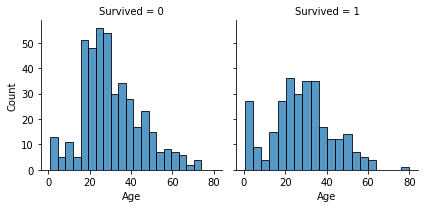

In [17]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.histplot, 'Age', bins = 20)

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


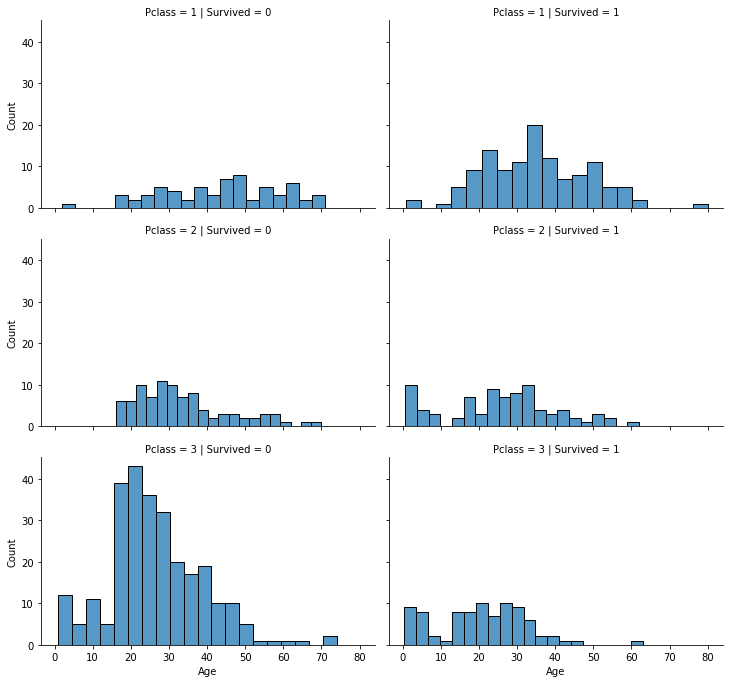

In [18]:
g = sns.FacetGrid(train, col='Survived', row='Pclass', size=3.2, aspect=1.6)
g.map(sns.histplot, 'Age', bins=20)

In [19]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


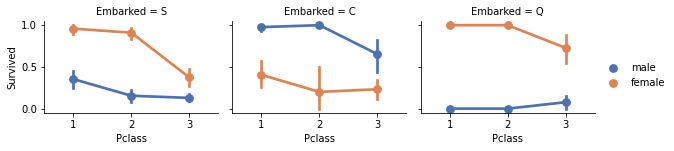

In [20]:
g = sns.FacetGrid(train, col='Embarked', size=2.2, aspect=1.3)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep' )
g.add_legend()

In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


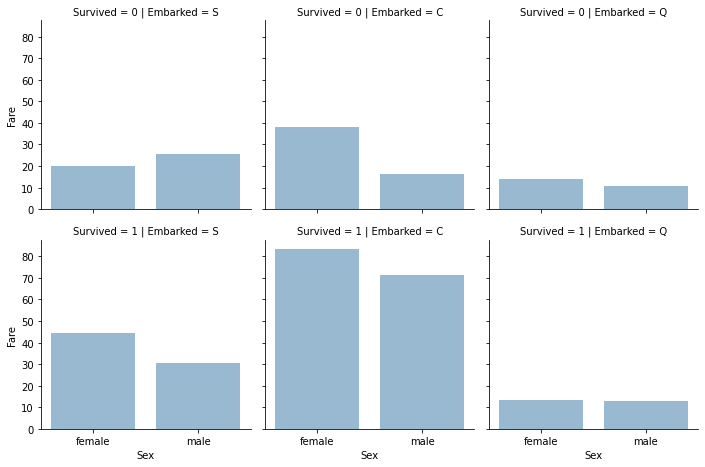

In [22]:
g = sns.FacetGrid(train, 'Survived', 'Embarked', size=3.3)
g.map(sns.barplot, 'Sex', 'Fare', ci=None, alpha=.5 )

# Wrangle Data

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We don't need ticket and cabin

In [24]:
print('Before ', train.shape, test.shape, combine[0].shape, combine[1].shape)

trains = train.drop(['Ticket', 'Cabin'], axis=1)
tests = test.drop(['Ticket', 'Cabin'], axis=1)
combines = [trains, tests]

print('After ', trains.shape, tests.shape, combines[0].shape, combines[1].shape)

Before  (891, 12) (418, 11) (891, 12) (418, 11)
After  (891, 10) (418, 9) (891, 10) (418, 9)


## Creating new feature extracting from existing¶


In [25]:
for dataset in combines:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(trains)
pd.crosstab(trains['Title'], trains['Sex'])

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
for i in combines:
    i['Title'] = i['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')
    i['Title'] = i['Title'].replace(['Mlle', 'Ms'], 'Miss')
    i['Title'] = i['Title'].replace(['Mme'], 'Mrs')

trains[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [27]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for i in combines:
    i['Title'] = i['Title'].map(title_mapping)
    i['Title'] = i['Title'].fillna(0)

combines

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [28]:
tests.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

In [29]:
trains.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [30]:
trains = trains.drop(['Name', 'PassengerId'], axis=1)
tests = tests.drop(['Name'], axis=1)
combines = [trains, tests]
trains.shape, tests.shape

((891, 9), (418, 9))

 converting Sex feature to a numerical where female=1 and male=0

In [31]:
for i in combines:
    i['Sex'] = i['Sex'].map({'female':1, 'male':0})
combines

[     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
 0           0       3    0  22.0      1      0   7.2500        S      1
 1           1       1    1  38.0      1      0  71.2833        C      3
 2           1       3    1  26.0      0      0   7.9250        S      2
 3           1       1    1  35.0      1      0  53.1000        S      3
 4           0       3    0  35.0      0      0   8.0500        S      1
 ..        ...     ...  ...   ...    ...    ...      ...      ...    ...
 886         0       2    0  27.0      0      0  13.0000        S      5
 887         1       1    1  19.0      0      0  30.0000        S      2
 888         0       3    1   NaN      1      2  23.4500        S      2
 889         1       1    0  26.0      0      0  30.0000        C      1
 890         0       3    0  32.0      0      0   7.7500        Q      1
 
 [891 rows x 9 columns],
      PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Title
 0            892   

Completing a numerical continuous feature

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: row, col. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


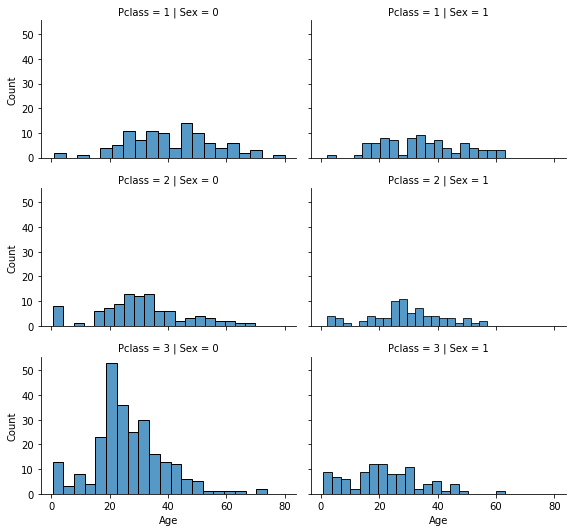

In [32]:
g = sns.FacetGrid(trains, 'Pclass', 'Sex', size=2.5, aspect=1.6)
g.map(sns.histplot, 'Age', bins=20)
g.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [33]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

In [34]:
for df in combines:
    for i in range(0, 2):
        for j in range(0, 3):
            
            print(i, ' ', j+1)
            guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
            print(guess_df)
            
            age_guess = guess_df.median()
            print('median : ',age_guess)
            
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)

trains.head()

0   1
6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
822    38.0
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 101, dtype: float64
median :  40.0
0   2
20     35.0
21     34.0
33     66.0
70     32.0
72     21.0
       ... 
848    28.0
861    21.0
864    24.0
883    28.0
886    27.0
Name: Age, Length: 99, dtype: float64
median :  30.0
0   3
0      22.0
4      35.0
7       2.0
12     20.0
13     39.0
       ... 
876    20.0
877    19.0
881    33.0
884    25.0
890    32.0
Name: Age, Length: 253, dtype: float64
median :  25.0
1   1
1      38.0
3      35.0
11     58.0
52     49.0
61     38.0
       ... 
856    45.0
862    48.0
871    47.0
879    56.0
887    19.0
Name: Age, Length: 85, dtype: float64
median :  35.0
1   2
9      14.0
15     55.0
41     27.0
43      3.0
53     29.0
       ... 
854    44.0
865    42.0
866    27.0
874    28.0
880    25.0
Name: Age, Length: 74, dtype: float64
median :  28.0
1   3
2      26.0
8      27.0
10      4.0
1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Let us create Age bands and determine correlations with Survived.

In [35]:
trains['AgeBand'] = pd.cut(trains['Age'], 5)
trains[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [36]:
for dataset in combines:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=5
trains

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,"(16.0, 32.0]"
887,1,1,1,1,0,0,30.0000,S,2,"(16.0, 32.0]"
888,0,3,1,1,1,2,23.4500,S,2,"(16.0, 32.0]"
889,1,1,0,1,0,0,30.0000,C,1,"(16.0, 32.0]"


In [37]:
trains = trains.drop(['AgeBand'], axis=1)
combines = [trains, tests]
trains.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [38]:
tests

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,2,0,0,7.8292,Q,1.0
1,893,3,1,2,1,0,7.0000,S,3.0
2,894,2,0,3,0,0,9.6875,Q,1.0
3,895,3,0,1,0,0,8.6625,S,1.0
4,896,3,1,1,1,1,12.2875,S,3.0
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1.0
414,1306,1,1,2,0,0,108.9000,C,0.0
415,1307,3,0,2,0,0,7.2500,S,1.0
416,1308,3,0,1,0,0,8.0500,S,1.0


Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [39]:
for dataset in combines:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    # here single 1 is the person...

trains[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [40]:
for dataset in combines:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

trains[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [41]:
trains

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5,1,1
887,1,1,1,1,0,0,30.0000,S,2,1,1
888,0,3,1,1,1,2,23.4500,S,2,4,0
889,1,1,0,1,0,0,30.0000,C,1,1,1


In [42]:
trains = trains.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
tests = tests.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combines = [trains, tests]

trains.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


We can also create an artificial feature combining Pclass and Age.

In [43]:
for dataset in combines:
    dataset['Age*pclass'] = dataset.Age * dataset.Pclass

trains.loc[:, ['Age*pclass', 'Age', 'Pclass']].head(10)

,Age*pclass,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Completing a categorial feature

In [44]:
freq_port = trains.Embarked.dropna().mode()[0]
freq_port

'S'

In [45]:
for df in combines:
    df['Embarked'] = df.Embarked.fillna(freq_port)

trains[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for df in combines:
    df['Embarked'] = df.Embarked.map({'S':0, 'Q':1, 'C':2}).astype(int)

In [47]:
trains

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*pclass
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,2,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,0,5,1,2
887,1,1,1,1,30.0000,0,2,1,1
888,0,3,1,1,23.4500,0,2,0,3
889,1,1,0,1,30.0000,2,1,1,1


In [48]:
tests

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*pclass
0,892,3,0,2,7.8292,1,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,1,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,8.0500,0,1.0,1,3
414,1306,1,1,2,108.9000,2,0.0,1,2
415,1307,3,0,2,7.2500,0,1.0,1,6
416,1308,3,0,1,8.0500,0,1.0,1,3


In [49]:
tests.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
IsAlone        0
Age*pclass     0
dtype: int64

In [50]:
tests['Fare'].fillna(tests['Fare'].dropna().median(), inplace=True)
tests.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
IsAlone        0
Age*pclass     0
dtype: int64

In [51]:
trains['FareBand'] = pd.qcut(trains['Fare'], 4)
trains[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [52]:
for dataset in combines:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

trains = trains.drop(['FareBand'], axis=1)
combines = [trains, tests]
    
trains.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*pclass
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,2,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,1,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,2,3,0,0


# modelling

In [53]:
x_train = trains.drop('Survived', axis=1)
y_train = trains.Survived
x_test = tests.drop('PassengerId', axis=1)
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
reg = LogisticRegression()
reg.fit(x_train, y_train)


LogisticRegression()

In [56]:
y_pred = reg.predict(x_test)
acc_log = round(reg.score(x_train, y_train) * 100, 2)
acc_log


81.37

In [57]:
reg.score(x_test, y_pred)

1.0

In [58]:
coeff_df = pd.DataFrame(trains.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.213516
5,Title,0.419567
4,Embarked,0.279047
6,IsAlone,0.204632
7,Age*pclass,-0.054476
3,Fare,-0.095419
2,Age,-0.442567
0,Pclass,-1.159549


# Decision tree

In [59]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
round(model.score(x_train, y_train) * 100, 2)

86.64

In [61]:
x_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*pclass
0,3,0,2,0,1,1.0,1,6
1,3,1,2,0,0,3.0,0,6
2,2,0,3,1,1,1.0,1,6
3,3,0,1,1,0,1.0,1,3
4,3,1,1,1,0,3.0,0,3
...,...,...,...,...,...,...,...,...
413,3,0,1,1,0,1.0,1,3
414,1,1,2,3,2,0.0,1,2
415,3,0,2,0,0,1.0,1,6
416,3,0,1,1,0,1.0,1,3


In [62]:

a = model.predict(x_test)

model.score(x_test, a)


1.0

# Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=400)

In [64]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400)

In [65]:
model.score(x_train, y_train)

0.8664421997755332

In [66]:
y_pred = model.predict(x_test)
model.score(x_test, y_pred)

1.0

# Support Vector Machine

In [67]:
from sklearn.svm import SVC
model = SVC()

In [68]:
model.fit(x_train, y_train)

SVC()

In [69]:
model.score(x_train, y_train)

0.8226711560044894

In [70]:
y_pred = model.predict(x_test)
model.score(x_test, y_pred)

1.0

# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier as kc

In [72]:
model = kc()

In [73]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [74]:
model.score(x_train, y_train)

0.8372615039281706

In [75]:
ypred = model.predict(x_test)
model.score(x_test, ypred)

1.0

In [76]:
from sklearn.neighbors import KNeighborsRegressor as kc

In [77]:
model = kc()

In [78]:
model.fit(x_train, y_train)

KNeighborsRegressor()

In [79]:
model.score(x_train, y_train)

0.4933735979292492

In [80]:
ypred = model.predict(x_test)
model.score(x_test, ypred)

1.0

# Naive bayes 

In [81]:
from sklearn.naive_bayes import GaussianNB as gss
model = gss()
model.fit(x_train, y_train)

GaussianNB()

In [82]:
model.score(x_train, y_train)

0.7687991021324355

In [83]:
ypred = model.predict(x_test)
model.score(x_test, ypred)

1.0

In [84]:
from sklearn.naive_bayes import MultinomialNB as mtb

model = mtb()
model.fit(x_train, y_train)

MultinomialNB()

In [85]:
model.score(x_train, y_train)

0.755331088664422